In [1]:
#http://equake-rc.info/SRCMOD/searchmodels/viewmodel/s2016KUMAMO01YAGI/からのすべりのデータ入力を受け取る
#一番下にコピペ用のslipのデータ
#rowは縦のグリッド数(例では10個)
#columnは横のグリッド数(例では28個)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
array = input("すべり分布を入力").split()  # スペースで区切られた入力を配列に格納
row =  int(input("行数を入力"))
column = int(input("列数を入力"))
float_array = list(map(float, array))  # 全ての要素をfloatに変換
two_d_array = []
for i in range(row):
    row = float_array[i*column:(i+1)*column]  # column(28)個の要素をスライスして取得
    two_d_array.append(row)
# print(two_d_array)
print(len(two_d_array))
print(len(two_d_array[0]))

#入力されたすべりのデータ
slip = np.array(two_d_array)

すべり分布を入力0.00         0.01         0.04         0.07         0.15         0.21         0.25         0.16         0.40         1.01         1.74         2.48         3.22         3.94         4.66         5.20         5.54         5.66         5.60         5.38         5.07         4.65         4.12         3.55         2.95         2.32         1.61         0.80 0.01         0.02         0.03         0.02         0.16         0.27         0.34         0.31         0.30         0.84         1.54         2.27         3.08         3.80         4.58         5.20         5.45         5.60         5.55         5.15         4.76         4.31         3.76         3.20         2.64         2.08         1.43         0.63   0.02         0.10         0.14         0.06         0.19         0.42         0.52         0.49         0.28         0.73         1.33         2.05         2.82         3.47         4.28         4.88         5.11         5.19         5.03         4.61         4.19         3.69 

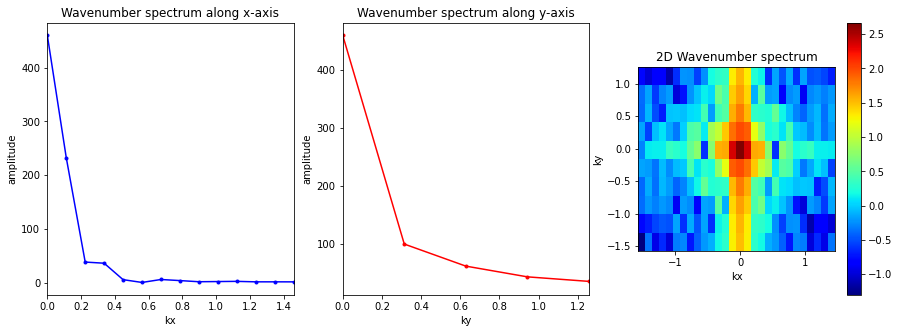

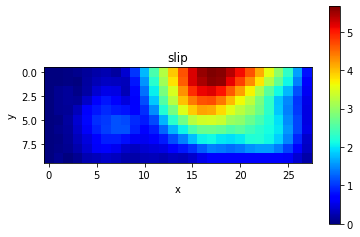

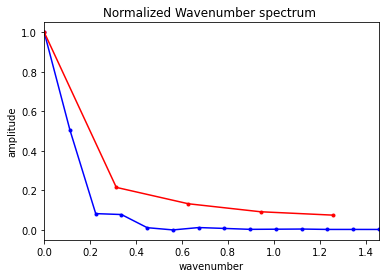

In [2]:
#実験的に任意の2次元断層すべり分布を生成する以外では、1つ上のセルですべりデータを受け取って、
#two_d_arrayを作る必要がある。

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

# 2次元断層すべりを生成する　幅56km,深さ20km
#データは10行18列
nx = 28 #サンプリング数
ny = 10
dx=2 #サンプリング間隔（dxはグリッドの横の長さ）
dy=2


#波数スペクトル行列の行（列）で。波数0が何番目なのかを探索する関数（必須ではない）
def judge(x):
    if(x % 2 == 0):
        return int(x / 2) 
    elif(x % 2 != 0):
        return int((x - 1) / 2)
    
# x軸方向の波数スペクトルを計算する
kx =2*np.pi* np.fft.fftfreq(slip.shape[1], d=dx) #データ点数28個
modified_kx = np.fft.fftshift(kx)    #波数の列を小さい順にする
kx_spec =np.abs(np.fft.fftshift(np.fft.fft2(slip))) #振幅

# y軸方向の波数スペクトルを計算する
ky = 2*np.pi*np.fft.fftfreq(slip.shape[0], d=dx) #データ点数10個
modified_ky = np.fft.fftshift(ky)    #波数の列を小さい順にする
ky_spec =np.abs(np.fft.fftshift(np.fft.fft2(slip))) #振幅


#出力する
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))
ax1.plot(modified_kx, kx_spec[judge(ny),:], 'b.-')  
ax1.set_xlabel('kx')
ax1.set_ylabel('amplitude')
ax1.set_title('Wavenumber spectrum along x-axis')
ax1.set_xlim(0, max(modified_kx))

ax2.plot(modified_ky, ky_spec[:,judge(nx)], 'r.-')  
ax2.set_xlabel('ky')
ax2.set_ylabel('amplitude')
ax2.set_title('Wavenumber spectrum along y-axis')
ax2.set_xlim(0, max(modified_ky))


# 2次元波数スペクトル（の絶対値の自然対数の分布）を描画する
im = ax3.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft2(slip)))), cmap='jet', origin="lower",extent=(min(kx), max(kx), min(ky), max(ky)))
ax3.set_xlabel('kx')
ax3.set_ylabel('ky')
ax3.set_title('2D Wavenumber spectrum')
fig.colorbar(im, ax=ax3)
im.autoscale()
plt.show()

#すべり分布の出力
plt.imshow(slip, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title("slip")
plt.show()


#波数0で1に規格化された縦方向の波数スペクトルと、横方向の波数スペクトルの出力
#kx_specの規格化：kx=0の列で全体を割る。
#こうすることで、どのkyの場合でも、始まりが1になる。
kx_spec_normalized = kx_spec / kx_spec[:,judge(nx)][:, np.newaxis] 
plt.plot(modified_kx,kx_spec_normalized[judge(ny),:], 'b.-')  

#ky_specの規格化：ky=0の行で割る
ky_spec_normalized = ky_spec / ky_spec[judge(ny),:]
plt.plot(modified_ky, ky_spec_normalized[:,judge(nx)], 'r.-')  

plt.xlabel('wavenumber')
plt.ylabel('amplitude')
plt.title('Normalized Wavenumber spectrum ')
plt.xlim(0, max(max(modified_ky), max(modified_kx)))
plt.show()


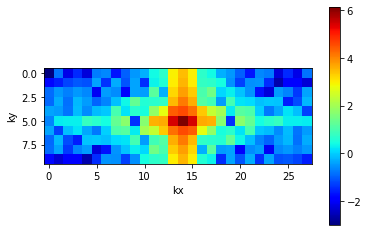

In [3]:

# 2次元FFTを計算する
fft2d = np.fft.fft2(slip)

# 中心化する
shifted_fft2d = np.fft.fftshift(fft2d)

# 2次元振幅スペクトルを計算する
secdim_wave_spectrum = np.abs(shifted_fft2d)

# 波数スペクトルを計算する
modified_kx, modified_ky = np.meshgrid(modified_kx, modified_ky)
modified_ks = np.sqrt(modified_kx**2 + modified_ky**2)

# 波数スペクトルを表示する
plt.imshow(np.log(secdim_wave_spectrum), cmap='jet')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar()
plt.show()

In [7]:
#フーリエ変換された2次元波数スペクトル（の絶対値の自然対数の分布）をcsvに保存する
#上のプログラムの2D Wavenumber spectrumが、この表をヒートマップにしたもの
TWS = np.log10(np.abs(np.fft.fftshift(np.fft.fft2(slip))))
twoD_spec_data = pd.DataFrame(TWS, index=modified_ky, columns=modified_kx)
twoD_spec_data.index.name = 'Ky'
twoD_spec_data.columns.name = 'Kx'
twoD_spec_data.to_csv("twoD_spec_data.csv")
twoD_spec_data

Kx,-1.570796,-1.458597,-1.346397,-1.234197,-1.121997,-1.009798,-0.897598,-0.785398,-0.673198,-0.560999,...,0.448799,0.560999,0.673198,0.785398,0.897598,1.009798,1.121997,1.234197,1.346397,1.458597
Ky,,,,,,,,,,,,,,,,,,,,,
-1.570796,-1.301030,-0.349675,-0.939702,-0.636201,-0.990972,-0.316163,-0.274140,-0.726113,-0.427190,-0.206521,...,-0.116889,-0.206521,-0.427190,-0.726113,-0.274140,-0.316163,-0.990972,-0.636201,-0.939702,-0.349675
-1.256637,-0.778690,-0.684158,-0.526847,-0.459429,-0.494450,-0.166378,-0.606924,-0.136858,-0.477319,-0.164969,...,0.185955,-0.235497,-0.547312,-0.236818,-0.232490,-0.632065,-1.143100,-0.810167,-0.807212,-0.994057
-0.942478,-0.373360,-0.207823,-0.302274,-0.206248,-0.270194,-0.884857,-0.187072,-0.261668,-0.860176,-0.158850,...,0.036069,0.134680,-0.037963,-0.221842,-0.732901,-0.983189,-0.200735,-0.282070,-0.576158,-0.165669
-0.628319,-0.393918,-0.138080,-0.359831,-0.090918,-0.201452,-0.416454,-0.286703,-0.053394,0.154990,0.571565,...,-0.193987,0.403578,0.087004,0.047150,-0.051523,-0.024869,-0.038327,-0.682600,-0.500674,-0.092972
-0.314159,-0.162880,-0.199927,-0.355184,-0.077186,-0.250993,-0.067599,-0.026694,0.417755,0.077479,0.292166,...,0.873855,0.109851,0.502786,0.450875,0.006803,-0.328371,-0.144161,0.090073,-0.058996,-0.556514
0.000000,-0.292430,0.121200,0.138348,0.138437,0.354387,0.278425,0.197323,0.569664,0.758242,-0.615541,...,0.735174,-0.615541,0.758242,0.569664,0.197323,0.278425,0.354387,0.138437,0.138348,0.121200
0.314159,-0.162880,-0.556514,-0.058996,0.090073,-0.144161,-0.328371,0.006803,0.450875,0.502786,0.109851,...,0.210894,0.292166,0.077479,0.417755,-0.026694,-0.067599,-0.250993,-0.077186,-0.355184,-0.199927
0.628319,-0.393918,-0.092972,-0.500674,-0.682600,-0.038327,-0.024869,-0.051523,0.047150,0.087004,0.403578,...,0.260320,0.571565,0.154990,-0.053394,-0.286703,-0.416454,-0.201452,-0.090918,-0.359831,-0.138080
0.942478,-0.373360,-0.165669,-0.576158,-0.282070,-0.200735,-0.983189,-0.732901,-0.221842,-0.037963,0.134680,...,-0.200551,-0.158850,-0.860176,-0.261668,-0.187072,-0.884857,-0.270194,-0.206248,-0.302274,-0.207823


In [8]:
#波数と振幅の関係
#波数成分(ky[i],kx[j])に属する振幅が、kx_spec[i,j]で表される。
spec_data = pd.DataFrame(kx_spec, index=modified_ky, columns=modified_kx)
spec_data.index.name = 'Ky'
spec_data.columns.name = 'Kx'
spec_data.to_csv("spec_data.csv")
spec_data

Kx,-1.570796,-1.458597,-1.346397,-1.234197,-1.121997,-1.009798,-0.897598,-0.785398,-0.673198,-0.560999,...,0.448799,0.560999,0.673198,0.785398,0.897598,1.009798,1.121997,1.234197,1.346397,1.458597
Ky,,,,,,,,,,,,,,,,,,,,,
-1.570796,0.050000,0.447018,0.114894,0.231100,0.102100,0.482877,0.531937,0.187883,0.373947,0.621555,...,0.764030,0.621555,0.373947,0.187883,0.531937,0.482877,0.102100,0.231100,0.114894,0.447018
-1.256637,0.166460,0.206939,0.297271,0.347193,0.320295,0.681746,0.247216,0.729697,0.333181,0.683961,...,1.534458,0.581438,0.283588,0.579672,0.585477,0.233311,0.071928,0.154822,0.155879,0.101378
-0.942478,0.423292,0.619694,0.498569,0.621945,0.536792,0.130360,0.650022,0.547435,0.137982,0.693665,...,1.086597,1.363577,0.916298,0.600010,0.184969,0.103947,0.629891,0.522312,0.265364,0.682859
-0.628319,0.403722,0.727646,0.436686,0.811114,0.628851,0.383306,0.516770,0.884314,1.428862,3.728763,...,0.639755,2.532668,1.221811,1.114681,0.888130,0.944345,0.915531,0.207682,0.315737,0.807288
-0.314159,0.687259,0.631063,0.441384,0.837171,0.561057,0.855857,0.940386,2.616709,1.195306,1.959596,...,7.479198,1.287807,3.182628,2.824064,1.015787,0.469493,0.717529,1.230476,0.872979,0.277643
0.000000,0.510000,1.321903,1.375144,1.375424,2.261449,1.898563,1.575155,3.712479,5.731152,0.242359,...,5.434682,0.242359,5.731152,3.712479,1.575155,1.898563,2.261449,1.375424,1.375144,1.321903
0.314159,0.687259,0.277643,0.872979,1.230476,0.717529,0.469493,1.015787,2.824064,3.182628,1.287807,...,1.625150,1.959596,1.195306,2.616709,0.940386,0.855857,0.561057,0.837171,0.441384,0.631063
0.628319,0.403722,0.807288,0.315737,0.207682,0.915531,0.944345,0.888130,1.114681,1.221811,2.532668,...,1.821040,3.728763,1.428862,0.884314,0.516770,0.383306,0.628851,0.811114,0.436686,0.727646
0.942478,0.423292,0.682859,0.265364,0.522312,0.629891,0.103947,0.184969,0.600010,0.916298,1.363577,...,0.630158,0.693665,0.137982,0.547435,0.650022,0.130360,0.536792,0.621945,0.498569,0.619694


In [ ]:
#slip(10*28)

0.00         0.01         0.04         0.07         0.15         0.21         0.25         0.16         0.40         1.01         1.74         2.48         3.22         3.94         4.66         5.20         5.54         5.66         5.60         5.38         5.07         4.65         4.12         3.55         2.95         2.32         1.61         0.80
0.01         0.02         0.03         0.02         0.16         0.27         0.34         0.31         0.30         0.84         1.54         2.27         3.08         3.80         4.58         5.20         5.45         5.60         5.55         5.15         4.76         4.31         3.76         3.20         2.64         2.08         1.43         0.63  
0.02         0.10         0.14         0.06         0.19         0.42         0.52         0.49         0.28         0.73         1.33         2.05         2.82         3.47         4.28         4.88         5.11         5.19         5.03         4.61         4.19         3.69         3.14         2.59         2.11         1.73         1.15         0.59  
0.02         0.10         0.14         0.12         0.37         0.62         0.82         0.64         0.48         0.63         1.13         1.83         2.55         3.23         3.98         4.42         4.66         4.69         4.43         4.04         3.63         3.28         2.82         2.31         1.81         1.46         1.00         0.52  
0.02         0.09         0.12         0.30         0.62         0.82         0.93         0.86         0.80         0.70         0.97         1.49         2.23         2.80         3.50         3.93         4.17         4.12         3.84         3.53         3.27         3.04         2.73         2.29         1.82         1.42         1.03         0.49  
0.01         0.04         0.16         0.41         0.74         0.96         1.03         1.16         1.12         0.95         0.86         1.11         1.71         2.27         2.76         3.25         3.42         3.44         3.34         3.03         2.96         2.71         2.47         2.19         1.96         1.50         1.10         0.50  
0.02         0.07         0.15         0.37         0.60         0.90         1.04         1.16         1.15         0.89         0.71         0.87         1.27         1.72         2.07         2.49         2.71         2.73         2.67         2.51         2.60         2.41         2.26         2.13         2.01         1.56         1.09         0.51  
0.01         0.04         0.13         0.30         0.47         0.72         0.88         0.88         0.78         0.58         0.56         0.63         0.85         1.14         1.43         1.77         2.06         2.11         2.00         1.95         2.03         2.19         2.23         2.10         1.87         1.45         0.91         0.38  
0.02         0.06         0.09         0.24         0.42         0.61         0.71         0.57         0.38         0.33         0.41         0.46         0.50         0.67         0.82         0.98         1.23         1.42         1.39         1.31         1.39         1.51         1.59         1.57         1.40         1.08         0.71         0.35  
0.01         0.09         0.02         0.11         0.25         0.29         0.37         0.32         0.23         0.22         0.28         0.30         0.26         0.31         0.30         0.39         0.55         0.68         0.68         0.70         0.70         0.68         0.70         0.72         0.66         0.60         0.40         0.20  